# Principal Component Analysis (PCA)
The main purposes of a **principal component analysis** are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.
Here, our desired outcome of the **principal component ananlysis** is to project a feature space(our dataset consisting of n d-dimensional samples) onto a smaller subspace that represents our data "well". A possible application would be a pattern classification task, where we want to reduce the computational costs and the error of parameter estimation by reducing the number of dimensions of our feature space by extracting a subspace that describes our data "best".
<br>
**PCA** is linear transformation methid and we are interested to find the directions(components) that maximize the variance in our dataset. We are projecting the entire set of data (without class labels) onto a different subspace. Or, roughly speaking in **PCA** we are trying to find the axes with maximum variances where data is most spread (within a class, since **PCA** treats the whole data set as one class).
<br>
What is a "good" subspace?
Let's assume that our goal is to reduce the dimensions of _a d-dimensional dataset_ by projecting it onto _a k-dimensional subspace_(where k < d). So how do we know what size we should choose for k, and how do we know if we have a feature space that represents our data "well"?
<br>
Later, we will compute eigenvectors(the components) from our data set and collect them in a so-called scatter-matrix(or alternatively calculate them from the covariance matrix). Each of those eigenvectors is associated with an eigenvalue, which tells us about the "length" or "magnitude" of the eigenvectors. If we observe that all the eigenvalues are of very similar magnitude, this is a good indicator that our data is already in a “good” subspace. Or if some of the eigenvalues are much much higher than others, we might be interested in keeping only those eigenvectors with the much larger eigenvalues, since they contain more information about our data distribution. Vice versa, eigenvalues that are close to 0 are less informative and we might consider in dropping those when we construct the new feature subspace.

# Summarizing the PCA approach
Listed below are the 6 general steps for performing a principal component analysis:
1. Take the whole dataset consisting of $d$-dimensional samples ignoring the class labels
2. Compute the $d$-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
4. Compute eigenvectors ($e_1, e_2,\cdots, e_d$) and corresponding eigenvalues ($\lambda_1, \lambda_2,\cdots, \lambda_d$)
5. Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $d \times k$ dimensional matrix (where every column represents an eigenvector)
6. Use this $d \times k$ eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: $y = W^T \times x$ (where $x$ is a $d \times 1$-dimensional vector representing one sample, and $y$ is the transformed $k \times 1$-dimensional sample in the new subspace.)

## Generating some 3-dimensional sample data
For the following example, we will generate 40 3-dimensional samples randomly drawn from a multivariate Gaussian distribution. Here, we will assume that the samples stem from two different classes, where one half(20) samples of our data set are labeled class 1($\omega_1$) and the other half class 2($\omega_2$).
<br>
$$\mu_1 = \begin{bmatrix}0 \\ 0 \\ 0\end{bmatrix} \quad \Sigma_1 = \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$$
<br>
$$\mu_2 = \begin{bmatrix}1 \\ 1 \\ 1\end{bmatrix} \quad \Sigma_2 = \begin{bmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{bmatrix}$$

Populating the interactive namespace from numpy and matplotlib
Class1 data:  [[ 2.212902    0.08238248  1.15727052  0.8478706   0.83180456 -1.67666183
  -0.80288458  0.18993115  0.57964676  0.32321392  0.27613222  0.09642087
   3.28724603  2.02425663 -0.46634995  1.13707908 -0.01902547 -0.13065605
  -0.70684046  0.69419178]
 [ 2.1283978   0.85896368  1.37591514  0.52969142  0.23359639  0.03332262
  -0.83511902 -0.05553701 -0.32022184  1.3743362   0.16255978 -1.88685108
   0.20887862  0.31962522  0.36948569 -1.73136278  0.85122081 -0.97135698
  -0.63678034  1.0559576 ]
 [ 1.8417114  -0.82601643  0.94302846 -0.56940469 -0.84767033  0.38044469
  -1.06883444  1.06244261 -0.26975584 -0.20494313 -0.43567345  0.58084648
  -0.5197155  -0.54229195 -0.32657848 -1.25268671 -0.43078668 -1.71895239
   0.12301059  0.38246087]]
Class2 data:  [[ 1.31772334  0.48697507  0.44068123  0.20593831  0.46621907  0.84525198
   1.46121526  1.52251546  0.85381421  1.49842541  0.46006553 -0.35493332
   0.80920485

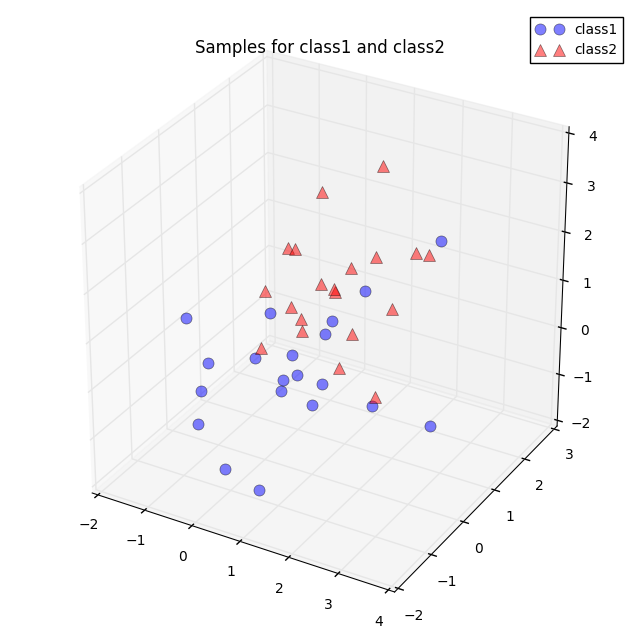

In [11]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

np.random.seed(123456789)  # random seed for consistency

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print("Class1 data: ",class1_sample)
assert class1_sample.shape == (3, 20), "The matrix has not the dimensions 3*20"

mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print("Class2 data: ",class2_sample)
assert class2_sample.shape == (3, 20), "The matrix has not the dimensions 3*20"

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, color='red', alpha=0.5, label='class2')
plt.title('Samples for class1 and class2')
ax.legend(loc='upper right')
plt.show()

### 1. Taking the whole dataset  ignoring the class labels
Because we don't need class labels for the PCA analysis, let us merge the samples for our 2 classes into one $3 \times 40$-dimensional array.

In [13]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
print("All samples: ", all_samples)
assert all_samples.shape == (3, 40), "The matrix has not the dimensions 3*40"

All samples:  [[ 2.212902    0.08238248  1.15727052  0.8478706   0.83180456 -1.67666183
  -0.80288458  0.18993115  0.57964676  0.32321392  0.27613222  0.09642087
   3.28724603  2.02425663 -0.46634995  1.13707908 -0.01902547 -0.13065605
  -0.70684046  0.69419178  1.31772334  0.48697507  0.44068123  0.20593831
   0.46621907  0.84525198  1.46121526  1.52251546  0.85381421  1.49842541
   0.46006553 -0.35493332  0.80920485  1.95453091 -0.93927149  2.11014045
   0.72289693  0.72006412  1.48248854  2.22098814]
 [ 2.1283978   0.85896368  1.37591514  0.52969142  0.23359639  0.03332262
  -0.83511902 -0.05553701 -0.32022184  1.3743362   0.16255978 -1.88685108
   0.20887862  0.31962522  0.36948569 -1.73136278  0.85122081 -0.97135698
  -0.63678034  1.0559576   0.70696723  0.12743762  0.51075279  1.83739594
   0.09266639  0.50449476  0.14311468  1.67688203  2.3519594   2.86802168
   2.76737745  1.42801563 -0.03639261  0.52541232  1.34514778  1.50243686
   0.72176673 -1.05114525 -0.03419818 -0.565968

### 2. Computing the d-dimensional mean vector

In [14]:
mean_x = np.mean(all_samples[0, :])
mean_y = np.mean(all_samples[1, :])
mean_z = np.mean(all_samples[2, :])

mean_vector = np.array([[mean_x], [mean_y], [mean_z]])
print("Mean Vector:\n", mean_vector)

Mean Vector:
 [[ 0.70557161]
 [ 0.51217168]
 [ 0.53242884]]


### 3. a)Computing the Scatter Matrix
The scatter matrix is computed by the following equation:
$$S = \sum_{k=1}^n (x_k - m)(x_k - m)^T$$
where $m$ is the mean vector $m = \frac{1}{n}\sum_{k=1}^n x_k$

In [15]:
scatter_matrix = np.zeros((3, 3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:, i].reshape(3, 1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 38.06005602   7.0360561    8.746127  ]
 [  7.0360561   46.74633774  16.76718342]
 [  8.746127    16.76718342  51.41006712]]


### 3. b)Computing the Covariance Matrix(alternatively to the scatter matrix)
Alternatively, instead of calculating the scatter matrix, we could also calculate the covariance matrix using the built-in _numpy.cov()_ function. The equations for the covariance matrix and scatter matrix are very similar, the only difference is, that we use the scaling factor $\frac{1}{N-1}$ (here: $\frac{1}{40-1}=\frac{1}{39}$) for the covariance matirx. Thus, their eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).
$$\Sigma_i = \begin{bmatrix}\sigma_{11}^2 & \sigma_{12}^2 & \sigma_{13}^2 \\ \sigma_{21}^2 & \sigma_{22}^2 & \sigma_{23}^2 \\ \sigma_{31}^2 & \sigma_{32}^2 & \sigma_{33}^2\end{bmatrix}$$

In [17]:
cov_mat = np.cov([all_samples[0, :], all_samples[1, :], all_samples[2, :]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.97589887  0.18041169  0.22425967]
 [ 0.18041169  1.19862404  0.42992778]
 [ 0.22425967  0.42992778  1.31820685]]


### 4. Computing eigenvectors and corresponding eigenvalues
To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an _assert_ statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.

In [18]:
# eigenvectors and eigenvalues for the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:, i].reshape(1, 3).T
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 3).T
    assert eigvec_sc.all() == eigvec_cov.all(), "Eigenvectors are not identical"
    print("Eigenvector {}: \n{}".format(i+1, eigvec_sc))
    print("Eigenvalue {} from scatter matrix: {}".format(i+1, eig_val_sc[i]))
    print("Eigenvalue {} from covariance matrix: {}".format(i+1, eig_val_cov[i]))
    print("Scaling factor: ", eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.3318243 ]
 [ 0.61650901]
 [ 0.7140093 ]]
Eigenvalue 1 from scatter matrix: 69.95225862431023
Eigenvalue 1 from covariance matrix: 1.7936476570335962
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.92464385]
 [-0.36251028]
 [-0.11670499]]
Eigenvalue 2 from scatter matrix: 34.19763985444257
Eigenvalue 2 from covariance matrix: 0.8768625603703227
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[-0.18688603]
 [-0.69892986]
 [ 0.69034098]]
Eigenvalue 3 from scatter matrix: 32.06656238803944
Eigenvalue 3 from covariance matrix: 0.8222195484112671
Scaling factor:  39.0
----------------------------------------


#### Visualizing the eigenvectors
And before we move on to the next step, just to satify our own curiosity, we plot the eigenvectors centered at the sample mean.

Populating the interactive namespace from numpy and matplotlib


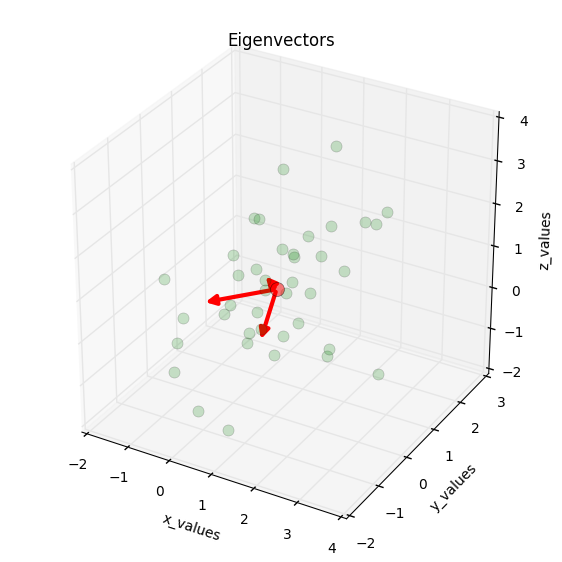

In [20]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()

### 5.1 Sorting the eigenvectors by decreasing eigenvalues
We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, where the eigenvectors will form the axes of this new feature subspace. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which we can confirm by the following code:

In [21]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))  # instead of 'assert' because of rounding errors

So, in order to decide which eigenvector(s) we want to drop for our lower-dimensional subspace, we have to take a look at the corresponding eigenvalues of the eigenvectors. **Roughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop.** The common approach is to rank the eigenvectors from highest to lowerest corresponding eigenvalue and choose the top $k$ eigenvectors.

In [23]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:, i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x:x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

69.9522586243
34.1976398544
32.066562388


### 5.2 Choosing k eigenvectors with the largest eigenvalues
For our simple example, where we are reducing a 3-dimensional feature space to 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our $d \times k$-dimensional eigenvector matrix $W$.

In [25]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3, 1), eig_pairs[1][1].reshape(3, 1)))
print("Matrix W:\n", matrix_w)

Matrix W:
 [[ 0.3318243   0.92464385]
 [ 0.61650901 -0.36251028]
 [ 0.7140093  -0.11670499]]


### 6. Transforming the samples onto the new subspace
In the last step, we use the $2 \times 3$-dimensional matrix $W$ that we just computed to transform our samples onto the new subspace via the equation $y = W^T \times x$.

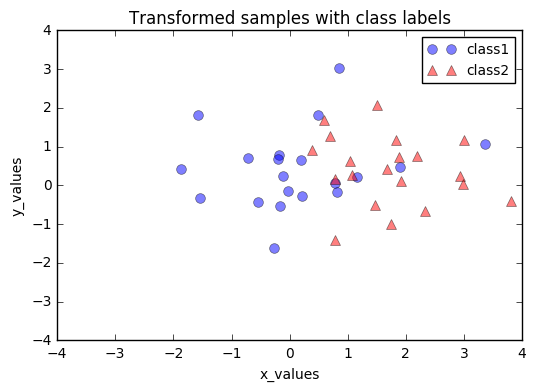

In [26]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2, 40), "The matrix is not 2*40 dimensional"
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')
plt.show()